In [172]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

Set up some variables

In [173]:
#distance in meters to PoI
distance = 15000
#uncertainty in meters around PoI
uncertainty = 1000
# number of pixels
no_pixels = 640
# Horizontal field of View, convert to radians
hfov = rad(5.5)

Do some simple calculations to get parameters for equation


In [174]:
phi = hfov/no_pixels

In [175]:
def find_depth_uncertainty_for_camera_distance(camera_distance):
    #half of distance D between cameras
    l = Symbol('l',real = True)
    # angle from higher pixel bound to d1
    alpha = Symbol('alpha',real = True)
    # depth uncertainty
    u = Symbol('u',real = True)
    l=camera_distance
    e1 = Eq( l/tan(alpha-phi),distance)
    #pprint(e1.simplify())
    alpha = solve(e1,alpha)
    #pprint(alpha[0])
    e2 = Eq( l/tan(alpha[0]),distance-u)
    return(solve(e2,u)[0])




In [188]:
find_depth_uncertainty_for_camera_distance(0.2)

13775.4294877255

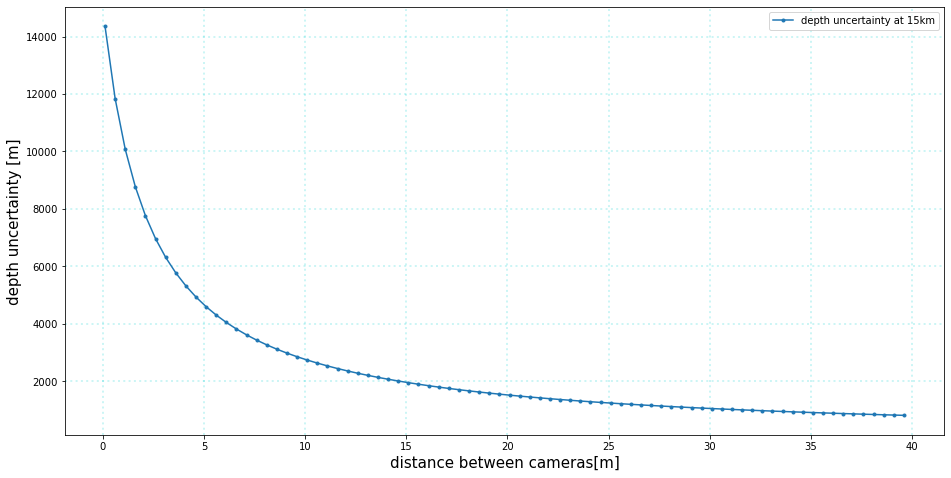

In [205]:

x =  np.arange(0.1, 40, 0.5);
y= np.empty(0)
for x_ in x:
  y=np.append(y,[find_depth_uncertainty_for_camera_distance(x_)])
plt.plot(x,y,label='depth uncertainty at 15km', marker=".")
plt.xlabel('distance between cameras[m]', fontsize=15)
plt.ylabel('depth uncertainty [m]', fontsize=15)
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.rcParams['figure.figsize'] = [40/2.54, 20/2.54]
plt.legend()
plt.show()
